In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
all_critic_opinions_with_notes=pd.read_csv('all_critic_opinions_with_notes.csv')
all_critic_opinions_with_notes=all_critic_opinions_with_notes.drop('Unnamed: 0',axis=1)
all_critic_opinions_with_notes=all_critic_opinions_with_notes.reset_index(drop=True)
all_critic_opinions_with_notes.sample(7)

,CRating,TMeter,Title,Critic,Year,ID,Genres,Genres1
5974,0.50,0.67,Amen,glenn-whipp,2003,106859,Drama|Musical,Musical
75436,1.00,0.93,Fantastic Mr. Fox,mark-dujsik,2009,72226,Adventure|Animation|Children|Comedy|Crime,Children|Animation
60605,0.90,0.87,Boy,diva-velez,2012,86000,Comedy|Drama,Comedy|Drama
59575,0.70,0.90,Lincoln,steve-persall,2012,98154,Drama|War,War
99932,0.40,0.62,Changeling,cynthia-fuchs,2008,63062,Crime|Drama|Mystery,Crime|Thriller
175507,0.25,0.65,Dan in Real Life,peter-keough,2007,55267,Comedy|Drama|Romance,Comedy|Romance
11044,0.40,0.14,Barefoot,mike-dangelo,2014,109853,Comedy|Drama|Romance,Comedy|Romance


In [4]:
data_for_kmeans=all_critic_opinions_with_notes.drop(['TMeter','Title','ID','Genres'],axis=1)
data_for_kmeans.head()                                                    

,CRating,Critic,Year,Genres1
0,0.70,alex-abad-santos,2017,Children|Animation
1,0.75,thelma-adams,2017,Children|Animation
2,0.80,sergio-lopez-aguirre,2017,Children|Animation
3,0.87,jeffrey-m-anderson,2017,Children|Animation
4,0.60,nigel-andrews,2017,Children|Animation


__Creating a crosstab with all the genres and average score given to a genre by a particular critic:__

In [5]:
data_for_kmeans2=pd.crosstab(data_for_kmeans.Critic,data_for_kmeans.Genres1,values=data_for_kmeans.CRating,aggfunc='mean')

In [6]:
data_for_kmeans2.head()

Genres1,Action|Adventure|Western,Children|Animation,Comedy,Comedy|Drama,Comedy|Romance,Crime|Thriller,Documentary,Drama,Drama|Romance,Horror,Musical,Sci-Fi|Fantasy,War
Critic,,,,,,,,,,,,,
aa-dowd,0.59,0.598235,0.542000,0.6435,0.658333,0.640682,0.671176,0.640455,0.589167,0.556875,0.60,0.627857,0.600
aaron-hillis,0.37,0.620000,0.481667,0.5800,0.494000,0.487368,0.694000,0.608571,0.466667,0.564167,0.37,0.530909,0.385
aaron-riccio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.75,NaN,NaN
aaron-yap,0.70,0.650000,0.800000,0.8000,NaN,0.784615,0.800000,0.630769,NaN,0.533333,0.40,0.533333,NaN
abigail-chandler,NaN,0.600000,NaN,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Crosstab contains some NaN values that have to be removed:__

In [6]:
data_for_kmeans2.isnull().sum(axis = 0)

Genres1
Action|Adventure|Western    571
Children|Animation          520
Comedy                      559
Comedy|Drama                606
Comedy|Romance              599
Crime|Thriller              328
Documentary                 566
Drama                       403
Drama|Romance               708
Horror                      540
Musical                     759
Sci-Fi|Fantasy              489
War                         739
dtype: int64

In [7]:
data_for_kmeans3=data_for_kmeans2[data_for_kmeans2.isnull().sum(axis = 1)==0]

__Final table for KMeans analysis includes data for 411 critics:__

In [8]:
data_for_kmeans3.head(10)

Genres1,Action|Adventure|Western,Children|Animation,Comedy,Comedy|Drama,Comedy|Romance,Crime|Thriller,Documentary,Drama,Drama|Romance,Horror,Musical,Sci-Fi|Fantasy,War
Critic,,,,,,,,,,,,,
aa-dowd,0.590000,0.598235,0.542000,0.643500,0.658333,0.640682,0.671176,0.640455,0.589167,0.556875,0.600000,0.627857,0.600000
aaron-hillis,0.370000,0.620000,0.481667,0.580000,0.494000,0.487368,0.694000,0.608571,0.466667,0.564167,0.370000,0.530909,0.385000
adam-graham,0.515000,0.626667,0.511667,0.580000,0.567500,0.525778,0.681429,0.624667,0.450000,0.595385,0.535000,0.550000,0.700000
adam-nayman,0.474000,0.565000,0.479048,0.592857,0.500000,0.522381,0.627895,0.645556,0.627000,0.532727,0.633333,0.542500,0.608750
adam-woodward,0.428571,0.672727,0.507692,0.590000,0.460000,0.505000,0.569231,0.600000,0.266667,0.450000,0.666667,0.444444,0.450000
al-alexander,0.654706,0.692857,0.627619,0.636818,0.619000,0.645556,0.767895,0.661957,0.633750,0.617500,0.600000,0.582273,0.818889
alan-jones,0.609524,0.670270,0.828571,0.766667,0.666667,0.723529,0.600000,0.740000,0.657143,0.754717,0.542857,0.706897,0.714286
ali-gray,0.609091,0.628571,0.625000,0.580000,0.600000,0.658182,0.750000,0.746667,0.400000,0.557895,0.900000,0.708696,0.685714
alison-willmore,0.687500,0.530000,0.524762,0.585556,0.628571,0.598276,0.660909,0.621515,0.704286,0.527778,0.610000,0.596875,0.675000


In [168]:
data_for_kmeans3.to_csv('data_for_kmeans400.csv')

In [3]:
data_for_kmeans400=pd.read_csv('data_for_kmeans400.csv')

In [10]:
data_for_kmeans400.head()

,Critic,Action|Adventure|Western,Children|Animation,Comedy,Comedy|Drama,Comedy|Romance,Crime|Thriller,Documentary,Drama,Drama|Romance,Horror,Musical,Sci-Fi|Fantasy,War
0,aa-dowd,0.590000,0.598235,0.542000,0.643500,0.658333,0.640682,0.671176,0.640455,0.589167,0.556875,0.600000,0.627857,0.60000
1,aaron-hillis,0.370000,0.620000,0.481667,0.580000,0.494000,0.487368,0.694000,0.608571,0.466667,0.564167,0.370000,0.530909,0.38500
2,adam-graham,0.515000,0.626667,0.511667,0.580000,0.567500,0.525778,0.681429,0.624667,0.450000,0.595385,0.535000,0.550000,0.70000
3,adam-nayman,0.474000,0.565000,0.479048,0.592857,0.500000,0.522381,0.627895,0.645556,0.627000,0.532727,0.633333,0.542500,0.60875
4,adam-woodward,0.428571,0.672727,0.507692,0.590000,0.460000,0.505000,0.569231,0.600000,0.266667,0.450000,0.666667,0.444444,0.45000


In [11]:
data_for_kmeans400.shape

(411, 14)

In [4]:
import numpy.random as rnd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics import silhouette_score
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN
%matplotlib inline

__Data does not need to be scaled, because all the values are between 0 and 1:__

In [13]:
data_for_kmeans400.describe()

,Action|Adventure|Western,Children|Animation,Comedy,Comedy|Drama,Comedy|Romance,Crime|Thriller,Documentary,Drama,Drama|Romance,Horror,Musical,Sci-Fi|Fantasy,War
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,0.610127,0.636356,0.553152,0.652553,0.599992,0.618828,0.702163,0.670003,0.631874,0.573376,0.630970,0.613841,0.650602
std,0.092062,0.085215,0.087849,0.089698,0.087503,0.072475,0.092603,0.071580,0.102437,0.103724,0.121831,0.081626,0.094491
min,0.250000,0.276190,0.222222,0.200000,0.300000,0.288000,0.300000,0.312069,0.266667,0.066667,0.000000,0.120000,0.200000
25%,0.559224,0.583788,0.497112,0.600000,0.541429,0.570242,0.650000,0.624140,0.580625,0.511465,0.560000,0.571898,0.595500
50%,0.615294,0.641429,0.553455,0.660000,0.604167,0.619932,0.706667,0.677083,0.638462,0.571765,0.632143,0.617759,0.653077
75%,0.663133,0.690826,0.603070,0.704066,0.655621,0.662378,0.757646,0.714143,0.688393,0.630541,0.700000,0.663843,0.711000
max,1.000000,1.000000,0.828571,0.933333,0.900000,0.900000,1.000000,0.900000,1.000000,1.000000,1.000000,0.880000,1.000000


__Checking the correlations between different genres according to critic average scores:__

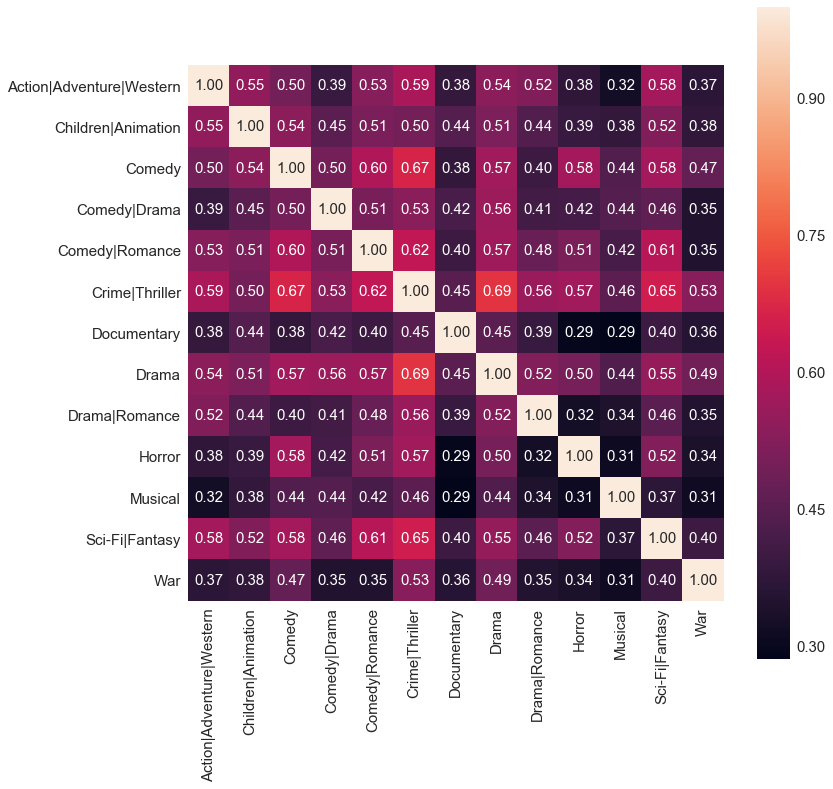

In [14]:
fig=plt.figure(figsize=(12, 12))
cols1=data_for_kmeans400.drop(['Critic'],axis=1).columns
cm=np.corrcoef(data_for_kmeans400.drop(['Critic'],axis=1)[cols1].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols1,xticklabels=cols1)
plt.show()

__Creating a dendrogram of genres preferences of critics (sample of 80 critics for better visibility):__

In [63]:
data_for_kmeans400_sample=data_for_kmeans400.sample(n=80).reset_index(drop=True)
data_for_kmeans400_sample.head()

,Critic,Action|Adventure|Western,Children|Animation,Comedy,Comedy|Drama,Comedy|Romance,Crime|Thriller,Documentary,Drama,Drama|Romance,Horror,Musical,Sci-Fi|Fantasy,War
0,john-anderson,0.628889,0.661538,0.584348,0.723111,0.588871,0.613673,0.735217,0.725870,0.635152,0.603750,0.640000,0.617333,0.659545
1,steve-murray,0.633333,0.595000,0.552857,0.501250,0.610000,0.644615,0.835000,0.707576,0.578333,0.523333,0.600000,0.700000,0.800000
2,josh-larsen,0.660206,0.658963,0.598077,0.675645,0.629074,0.617655,0.702727,0.711500,0.708750,0.594328,0.700294,0.641097,0.695814
3,rafer-guzman,0.589737,0.632615,0.555926,0.669375,0.535135,0.581150,0.639200,0.649375,0.554615,0.604762,0.486667,0.572857,0.657727
4,mick-lasalle,0.545325,0.598679,0.584479,0.671290,0.605888,0.636964,0.677091,0.666171,0.642394,0.580541,0.630000,0.605333,0.641538


In [64]:
mergings = linkage(data_for_kmeans400_sample.drop(['Critic'],axis=1), method='ward')

[]

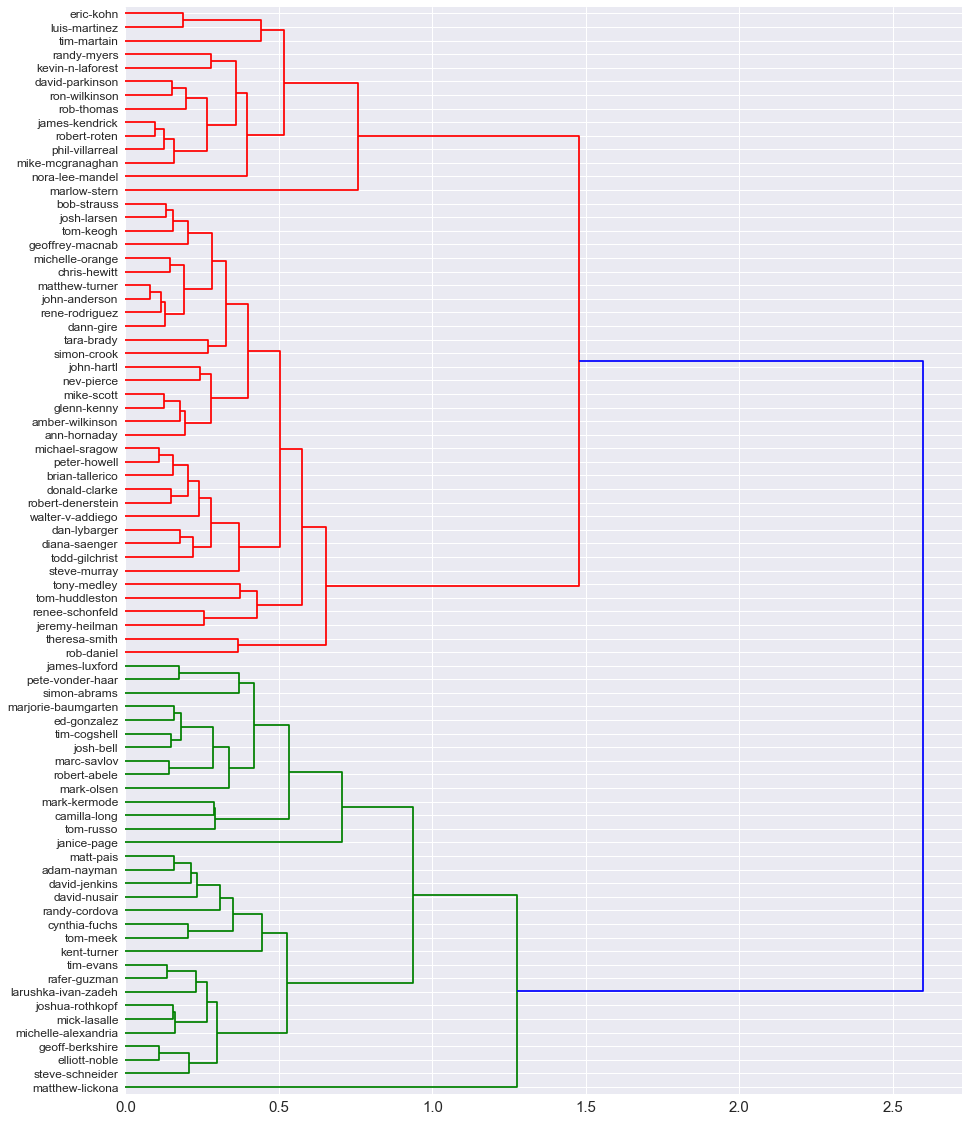

In [65]:
plt.figure(figsize=(15, 20))
dendrogram(mergings, labels=data_for_kmeans400_sample.Critic.values,leaf_font_size=12, orientation='right', leaf_rotation=0)
plt.plot()

__Clustering of critics into 4 clusters using KMeans:__

In [29]:
model = KMeans(n_clusters=4).fit(data_for_kmeans400.drop(['Critic'],axis=1))
labels1 = model.predict(data_for_kmeans400.drop(['Critic'],axis=1))

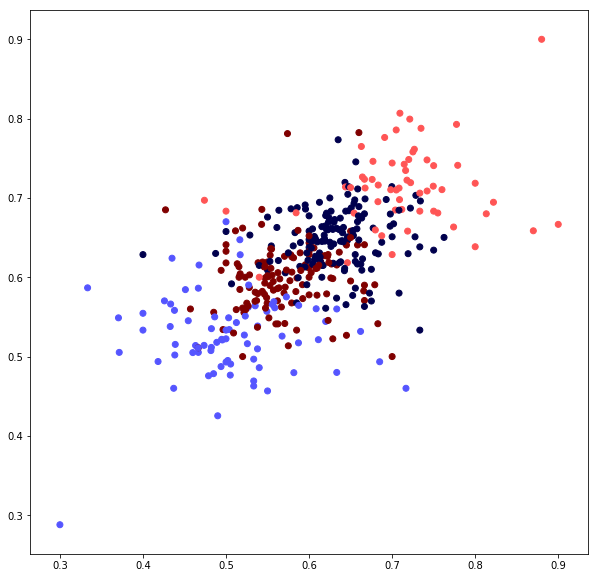

In [30]:
plt.figure(figsize=(10, 10))
plt.scatter(data_for_kmeans400.iloc[:, 5].values, data_for_kmeans400.iloc[:, 6].values, c=labels1,cmap='seismic')
plt.show()

__Presenting the clusters on the 3D graph:__

In [256]:
from mpl_toolkits.mplot3d import Axes3D

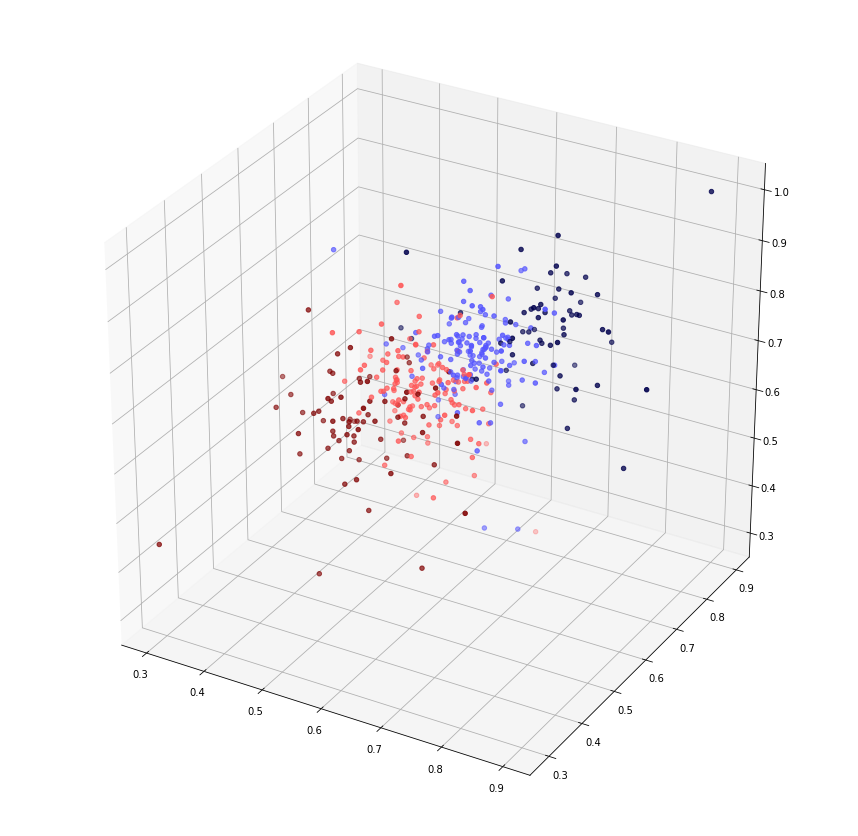

In [269]:
fig=plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_for_kmeans400.iloc[:, 5].values, data_for_kmeans400.iloc[:, 6].values,data_for_kmeans400.iloc[:, 7].values,
           c=labels1,cmap='seismic')

plt.show()

__Checking the optimal number of clusters analysing inertia and silhouette score:__

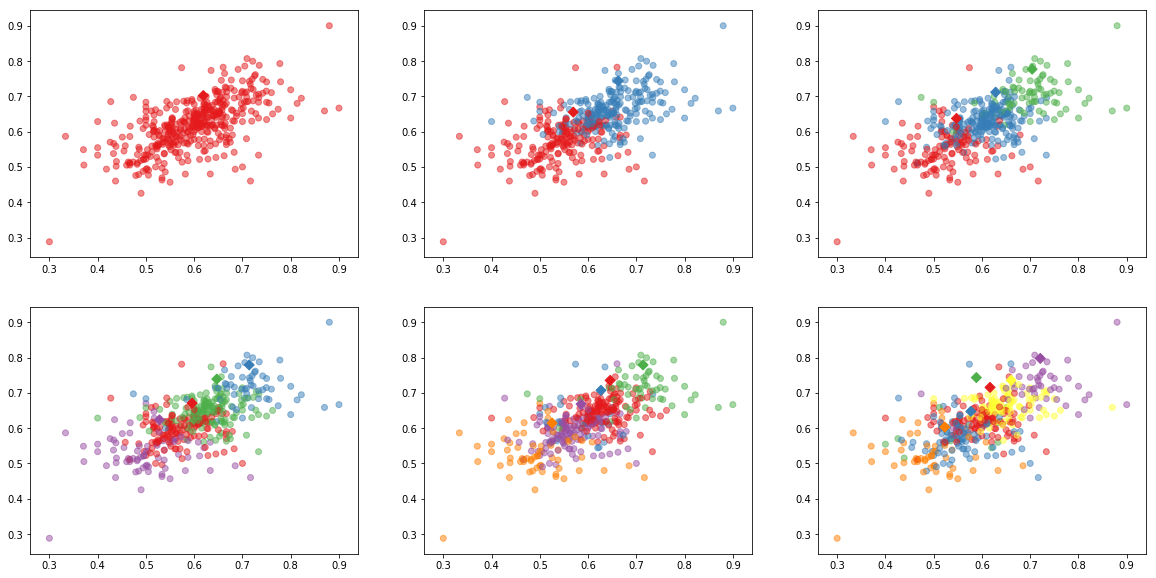

In [23]:
colors = np.array(sns.color_palette("Set1", 20))
inertias = []
plt.figure(figsize=(20, 10))
for i in range(1, 7):
    
    model = KMeans(n_clusters=i)
    
    model.fit(data_for_kmeans400.drop(['Critic'],axis=1))
    labels2 = model.predict(data_for_kmeans400.drop(['Critic'],axis=1))
    
    inertias.append(model.inertia_)
    
    plt.subplot(2, 3, i)
    plt.scatter(data_for_kmeans400.iloc[:, 5].values, data_for_kmeans400.iloc[:, 6].values, c=colors[labels2], alpha=0.5)
    plt.scatter(model.cluster_centers_[:, 5], model.cluster_centers_[:, 6], marker='D',
                c=colors, s=50)

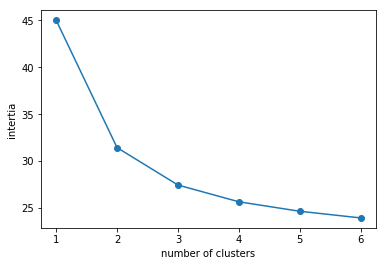

In [24]:
plt.plot(range(1, 7), inertias, '-o')
plt.xlabel('number of clusters')
plt.ylabel('intertia')
plt.show()

In [6]:
silhouette_scores = []
for i in range(2,8):
    model = KMeans(i)
    labels = model.fit_predict(data_for_kmeans400.drop(['Critic'],axis=1))
    sh_score = silhouette_score(data_for_kmeans400.drop(['Critic'],axis=1), labels)
    silhouette_scores.append(sh_score)

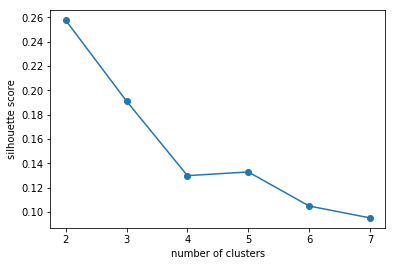

In [7]:
plt.plot(range(2,8), silhouette_scores, '-o')
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.show()

__Example of average critics' scores relations for 5 chosen genres:__

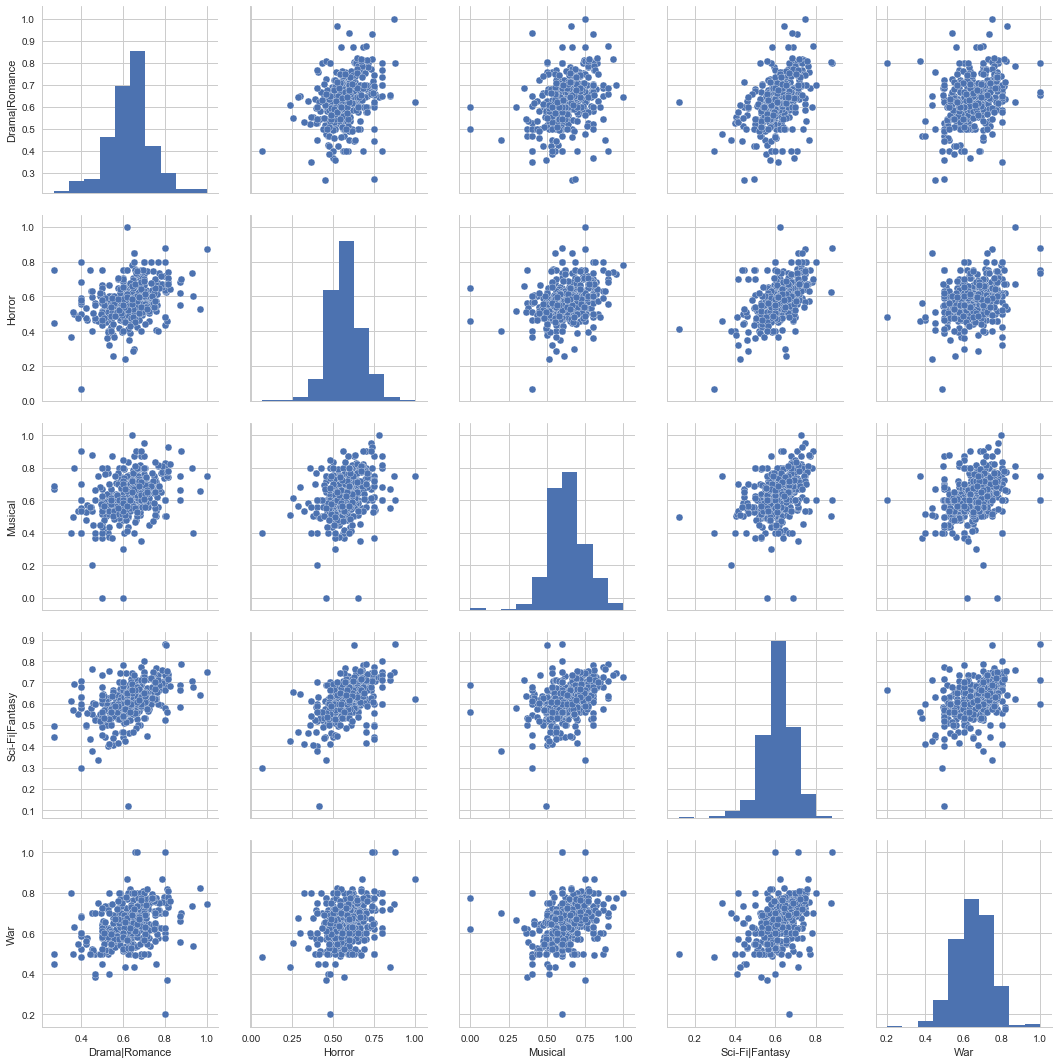

In [45]:
sns.set(style='whitegrid',context='notebook')
cols=data_for_kmeans400.drop(['Critic'],axis=1).columns[8:13]
ax=sns.pairplot(data_for_kmeans400.drop(['Critic'],axis=1)[cols],size=3)

plt.show()